<center><h1>s4019548 - Nguyen Khanh An</h1></center>
<center><h1>Assignment 1</h1></center>

In [3]:
!python --version

Python 3.12.4


___This project is running Python 3.12.4___

## ___1. Introduction___

In today's world, the ability to accurately predict human life expectancy has proven to be an invaluable asset to many industries. This project's goal is to deliver on that potential by developing a machine learning model that intake attribute's data to forecast human life expectancy.

The final solution of this project will be integrated into the decision-making process of various fields. For example, healthcare will use it to assist in strategic planning and preventive care initiatives, insurers will use it to refine risk assessment and pricing strategies, and government will be able to host effective health campaigns and allocate resources efficiently.

This project will go through the process of the machine learning procedure, which involves:
* ___Exploratory Data Analysis:___ Exploring the given data using various techniques to gain further insights.
* ___Data Preparation:___ Preprocess the data to be in an appropriate format 
* ___Short-list promising models:___ Explore different models and short-list the best ones.
* ___Fine-tune the system:___  Adjust the hyperparameters of the models for better accuracy.

Given the nature of the dataset and the goal of predicting life expectancy, this will be a model built around supervised learning. And since the target variable (life expectancy) is continuous, a regression technique is the most suitable.

## ___2. Exploratory Data Analysis___

In this section we will be performing Exploratory Data Analysis on the given dataset. This will include:
* Get the data
* Explore the data
* Prepare the data

All these process's purpose is to give a comprehensive view of the dataset, so that we can identify patterns, detect anomalies, and extract meaningful insights to inform future modeling and decision-making processes.

We will primary using these libraries to assist us with the EDA process:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)

Numpy version:  1.26.4
Pandas version:  2.2.2


* ___Numpy (1.26.4):___ A library for numerical computing in Python, supporting the creation and manipulation of large, multidimensional arrays and matrices, along with mathematical functions to operate on those arrays.
* ___Pandas (2.2.2):___ A data manipulation and analysis library built on top of NumPy, offering data structure like Series (one-dimensional) and DataFrame (two-dimensional) which are invaluable for handing and analyzing structured data, along with tools for data cleaning, aggregation, filtering and visualization. 
* ___Matplotlib (3.8.4):___ A data visualization library in Python, allowing users to create a variety of plots, such as line charts, bar graphs, scatter plots and histograms.

### ___2.1. Get the data___

First, we will retrieve the datasets, which currently reside in two csv files, the `train.csv` and `test.csv` by using Pandas `read_csv()` command, which will load the input files into a Pandas `DataFrame`.

In [15]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

* ___Given data:___ There are two dataframe that we are going to be using, `train_data` and `test_data`, which are the train dataset and the test dataset respectively. The train dataset will be used for model development, and the test dataset will be used for the model to predict the target attribute, human life expectancy, based on the attribute of the test dataset. We are going with the assumption that data splitting procedure has been taken, meaning proper randomization.

### ___2.2. Explore the data___

### ___2.2.1. Data overview___

Now that the data is here in form of `DataFrame`, we are now going to explore the data through various techniques such as descriptive statistics, data visualization, and correlation analysis.

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2070 non-null   float64
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2067 non-null   float64
 10  PercentageExpenditure         2062 non-null   float64
 11  Measles                       2070 non-null   float64
 12  BMI                           2063 non-null   float64
 13  Und

In [21]:
train_data.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263.0,262,264,62,0.01,71.279624,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,654.37,33736494.0,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271.0,278,264,64,0.01,73.523582,492.0,18.6,86.0,58.0,8.18,62.0,0.1,686.22,327582.0,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268.0,246,290,66,0.01,73.219243,430.0,18.1,89.0,62.0,8.13,64.0,0.1,707.55,31731688.0,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272.0,248,296,69,0.01,78.184215,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,750.35,3696958.0,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275.0,278,272,71,0.01,7.097109,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,71.16,2978599.0,18.2,18.2,0.454,3.082207


As for initial impression goes, there are a total of 24 columns of data. One of which is unusable for the development of the model, the "ID" column, since its only purpose is to index the rows of data. Since  the `"TARGET_LifeExpectancy"` column is clearly labeled as `"TARGET"`, and based on the purpose of this project, this effectively mean that this is the target attributes for the model. Although all the attributes are represented as numerical values, it does not mean that they all represent continuous numerical quantities; some attributes may use numbers for other purposes, such as indexing, categorical labeling, or representing boolean values. Not accounting for this when in the data preparation process will significantly hinder the accuracy of the model.

These are the attributes that we are going to work with and their description:

* ___TARGET-LifeExpectancy:___ Life Expectancy in age (years)
* ___Country:___ Index of Country
* ___Year:___ Year
* ___Status:___ Developed or Developing status (0, 1)
* ___AdultMortality:___ Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* ___AdultMortality-Female:___ Adult Mortality Rates of Female (probability of dying between 15 and 60 years per 1000 population)
* ___AdultMortality-Male:___ Adult Mortality Rates of Male (probability of dying between 15 and 60 years per 1000 population)
* ___SLS:___ Number of Short Life Span per 1000 population
* ___Alcohol:___ Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* ___PercentageExpenditure:___ Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* ___Measles:___ Measles - number of reported cases per 1000 population
* ___BMI:___ Average Body Mass Index of entire population
* ___Under5LS:___ Number of under-five Life Span per 1000 population
* ___Polio:___ Polio (Pol3) immunization coverage among 1-year-olds (%)
* ___TotalExpenditure:___ General government expenditure on health as a percentage of total government expenditure (%)
* ___Diphtheria:___ Diphtheria tetanus toroid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* ___HIV-AIDS:___ Factor indicating between 0-4 years life span per 1000 HIV/AIDS 
* ___GDP:___ Gross Domestic Product per capita (in USD)
* ___Population:___ Population of the country
* ___Thinness1-19years:___ Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* ___Thinness5-9years:___ Prevalence of thinness among children for Age 5 to 9(%)
* ___IncomeCompositionOfResources:___ Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* ___Schooling:___ Schooling indicator

As I review all the attribute, I notice that some of the names are either confusing or are written incorrectly:
* ___TARGET-LifeExpectancy:___ The "TARGET" moniker might cause some confusion when not considering the context of machine learning.
* ___Thinness1-19years:___ This attribute measures the prevalence of thinness among age 10 to 19, and yet it is written as 1-19.

So we will be changing "TARGET-LifeExpectancy" to "LifeExpectancy" and "Thinness1-19years" to "Thinness10-19years" for accuracy and clarity purposes.

In [24]:
train_data = train_data.rename(columns={"TARGET_LifeExpectancy": "LifeExpectancy",
                 "Thinness1-19years": "Thinness10-19years"})

In [25]:
missing_data = (train_data.isnull().mean() * 100).round(2)
print(missing_data)

ID                              0.00
LifeExpectancy                  0.00
Country                         0.00
Year                            0.00
Status                          0.00
AdultMortality                  0.05
AdultMortality-Male             0.00
AdultMortality-Female           0.00
SLS                             0.00
Alcohol                         0.19
PercentageExpenditure           0.43
Measles                         0.05
BMI                             0.39
Under5LS                        0.05
Polio                           0.05
TotalExpenditure                0.48
Diphtheria                      0.00
HIV-AIDS                        0.14
GDP                             0.43
Population                      0.39
Thinness10-19years              0.05
Thinness5-9years                0.05
IncomeCompositionOfResources    0.24
Schooling                       0.34
dtype: float64


In [26]:
print("Amount of columns containing null value:", train_data.isnull().any().sum())

Amount of columns containing null value: 15


* ___Missing data statistics:___ There are a total of 15 columns containing N/A values, most of them has the percentage of missing values below 1%.

In [28]:
missing_data[missing_data > 0].index

Index(['AdultMortality', 'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI',
       'Under5LS', 'Polio', 'TotalExpenditure', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness10-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

* ___Column containing missing data:___ 'AdultMortality', 'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI',
       'Under5LS', 'Polio', 'TotalExpenditure', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness10-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'.

### ___2.2.2. Feature understanding___

Before we do anything, we are going to drop the "ID" attribute as it will not be useful for data analysis and model training further down the line.

In [32]:
train_data = train_data.drop(columns={"ID"})

Next, we will proceed to create histograms and box plots for every attribute for distribution analysis.

___LifeExpectancy:___

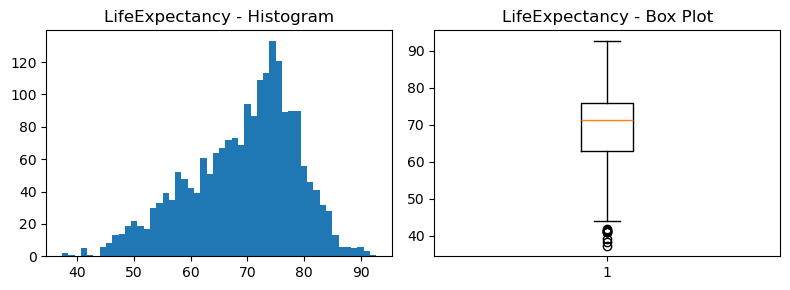

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["LifeExpectancy"], bins=50)
axes[0].set_title('LifeExpectancy - Histogram')

axes[1].boxplot(train_data["LifeExpectancy"])
axes[1].set_title('LifeExpectancy - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* The target attributes follow a Gaussian distribution, though slightly skewed to the left, indicating a slightly lower than average life expectancy values.

___Country:___

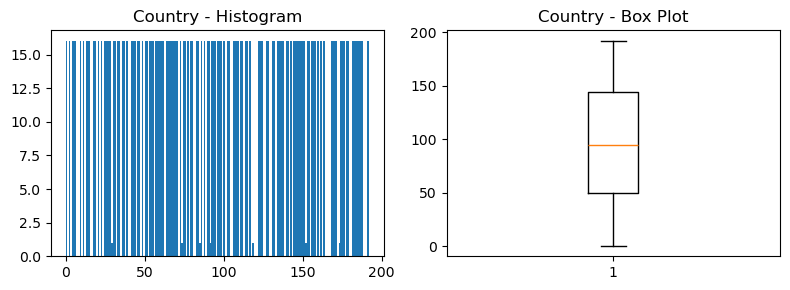

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Country"], bins=200)
axes[0].set_title('Country - Histogram')

axes[1].boxplot(train_data["Country"])
axes[1].set_title('Country - Box Plot')

plt.tight_layout()
plt.show()

* Type: Nominal Variables
* This attribute have a uniform distribution with some outliers here and there, indicating that most of the countries retries data for life expectancy roughly the same amount of times over the years.

___Year:___

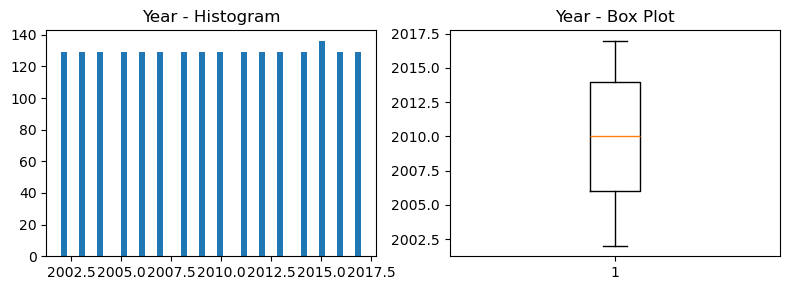

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Year"], bins=50)
axes[0].set_title('Year - Histogram')

axes[1].boxplot(train_data["Year"])
axes[1].set_title('Year - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* This attribute has a uniform distribution, indicating that each year the dataset receives the same amount of entries.

___Status:___

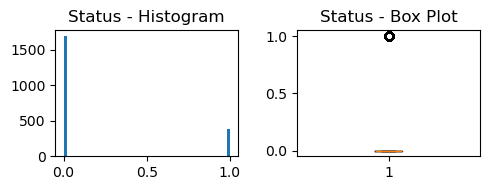

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2))

axes[0].hist(train_data["Status"], bins=50)
axes[0].set_title('Status - Histogram')

axes[1].boxplot(train_data["Status"])
axes[1].set_title('Status - Box Plot')

plt.tight_layout()
plt.show()

* Type: Nominal Categorical Variables
* We can see that a majority of the country available in this dataset is from developed countries, which might indicate that the final model of this project is going to be more accurate when predicting life expectancy for developed countries. This might be a concern for the project considering developing countries take up the majority of the world.

___AdultMortality:___

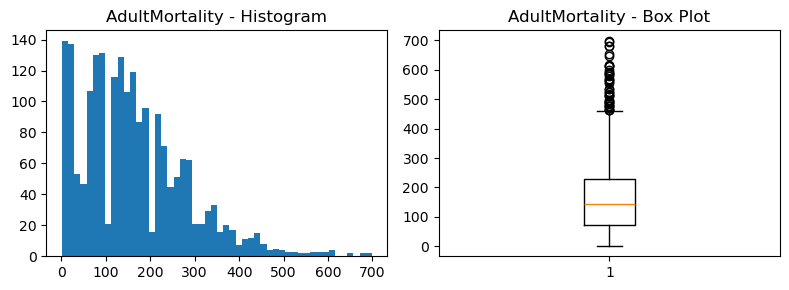

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["AdultMortality"], bins=50)
axes[0].set_title('AdultMortality - Histogram')

axes[1].boxplot(train_data["AdultMortality"].dropna())
axes[1].set_title('AdultMortality - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* The adult mortality rate seems to be skewed toward the right side, indicating a generally low mortality rates. This could possibly be related to the fact that most of the countries featured here are developed countries, thus have access to more medical care than developing countries.

___AdultMortality-Male, AdultMortality-Female:___

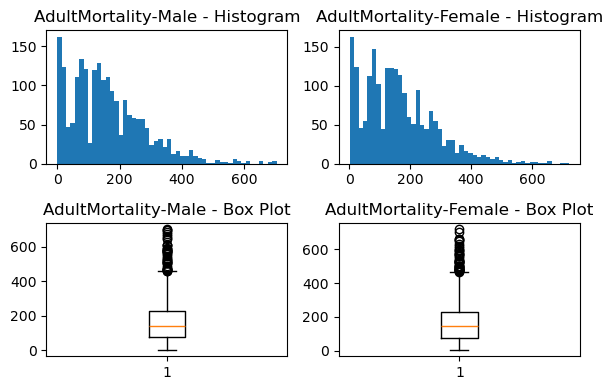

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

axes[0, 0].hist(train_data["AdultMortality-Male"], bins=50)
axes[0, 0].set_title('AdultMortality-Male - Histogram')

axes[1, 0].boxplot(train_data["AdultMortality-Male"].dropna())
axes[1, 0].set_title('AdultMortality-Male - Box Plot')

axes[0, 1].hist(train_data["AdultMortality-Female"], bins=50)
axes[0, 1].set_title('AdultMortality-Female - Histogram')

axes[1, 1].boxplot(train_data["AdultMortality-Female"].dropna())
axes[1, 1].set_title('AdultMortality-Female - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* These two attributes have a very similar distribution to the `AdultMortality` attribute, so there is not much to discuss without repeating what was said for the aforementioned attribute.

___SLS:___

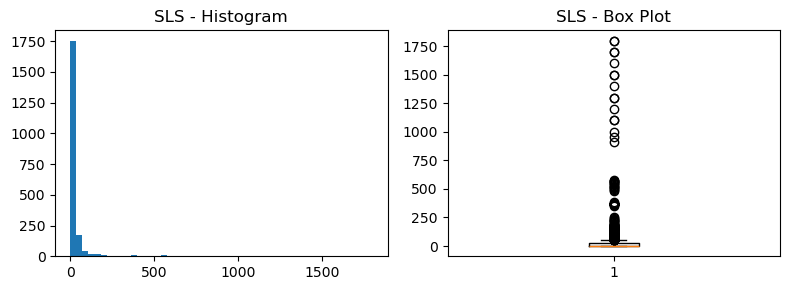

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["SLS"], bins=50)
axes[0].set_title('SLS - Histogram')

axes[1].boxplot(train_data["SLS"].dropna())
axes[1].set_title('SLS - Box Plot')

plt.tight_layout()
plt.show()

* As we can see here, there are data that exceed the values of 1000, which is an indicator of inaccurate data. This attribute is meant for the number of Short Life Span per 1000 population, and anything over 1000 is invalid. We are going to handle this anomaly later in the `Prepare the data` section. But for now, we will only view the values that are 1000 or belows.

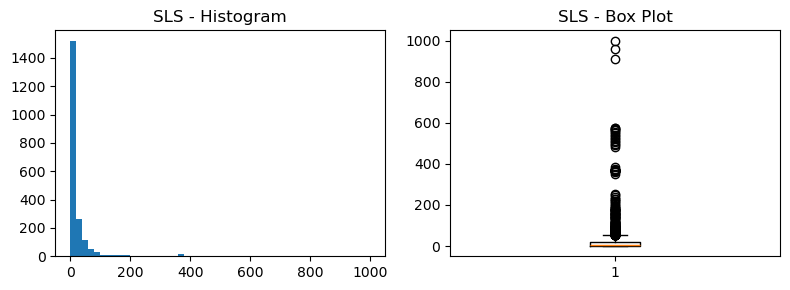

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

filtered_data = train_data["SLS"][train_data["SLS"] <= 1000]

axes[0].hist(filtered_data, bins=50)
axes[0].set_title('SLS - Histogram')

axes[1].boxplot(filtered_data.dropna())
axes[1].set_title('SLS - Box Plot')

plt.tight_layout()
plt.show()

In [56]:
train_data["SLS"].value_counts().head(10)

SLS
0     577
1     217
2     159
3     135
4      51
8      50
7      47
6      44
9      42
10     29
Name: count, dtype: int64

* Type: Continuous Variables
* For a majority of the entries, the amount of SLS per 1000 people is less than 50, with a few outlier here and there. This generally indicate that in general, people have a long life span.

___Alcohol:___

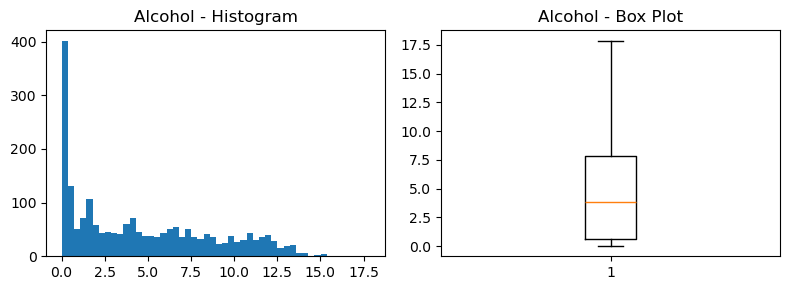

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Alcohol"], bins=50)
axes[0].set_title('Alcohol - Histogram')

axes[1].boxplot(train_data["Alcohol"].dropna())
axes[1].set_title('Alcohol - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* A large chunk of the entries indicate low alcohol consumtion, with the average ranging from none at all to 7.5 liters.

* ___PercentageExpenditure:___

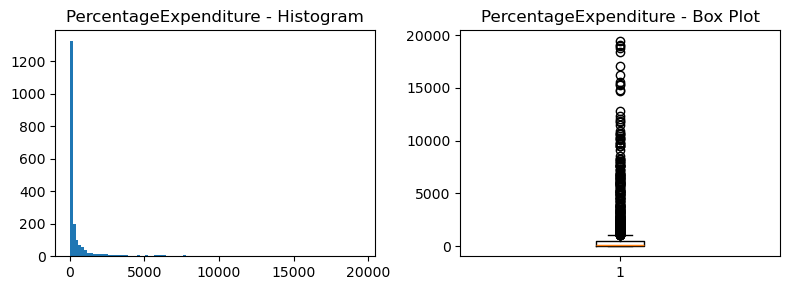

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["PercentageExpenditure"], bins=100)
axes[0].set_title('PercentageExpenditure - Histogram')

axes[1].boxplot(train_data["PercentageExpenditure"].dropna())
axes[1].set_title('PercentageExpenditure - Box Plot')

plt.tight_layout()
plt.show()

In [63]:
train_data["PercentageExpenditure"].value_counts().head()

PercentageExpenditure
0.000000      407
71.279624       1
183.659219      1
40.825971       1
42.526896       1
Name: count, dtype: int64

* Type: Continuous Variables
* We can see a very right-skewed distribution, with a significant chunk of the entries have a percentage expenditure value of 0.

* ___Measles:___

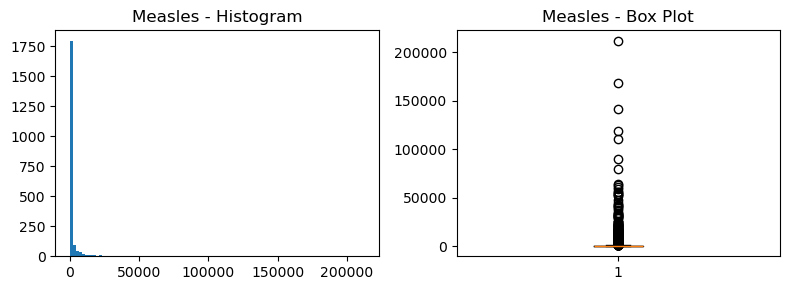

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Measles"], bins=100)
axes[0].set_title('Measles - Histogram')

axes[1].boxplot(train_data["Measles"].dropna())
axes[1].set_title('Measles - Box Plot')

plt.tight_layout()
plt.show()

* Similar to the case of SLS, there's appear to be inaccurate data, as this attribute is meant to represent cases per 1000 people, and there are data points well over 1000. This will also be dealt with in the `Prepare the data` section. But for now, we will see all the data that is 1000 or less represented as histogram and box plot.

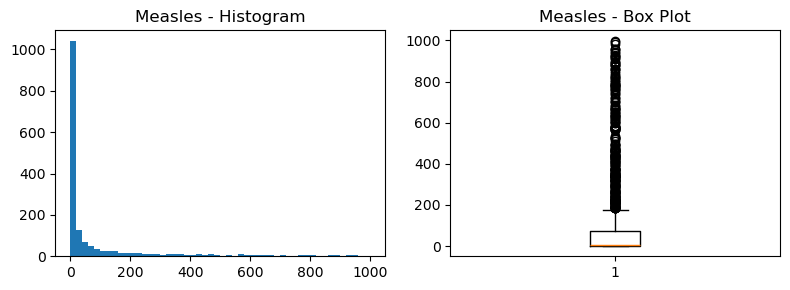

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

filtered_data = train_data["Measles"][train_data["Measles"] <= 1000]

axes[0].hist(filtered_data, bins=50)
axes[0].set_title('Measles - Histogram')

axes[1].boxplot(filtered_data.dropna())
axes[1].set_title('Measles - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* We can see a very right-skewed distribution, with a significant chunk of the entries have 0 reported measle cases.

___BMI:___

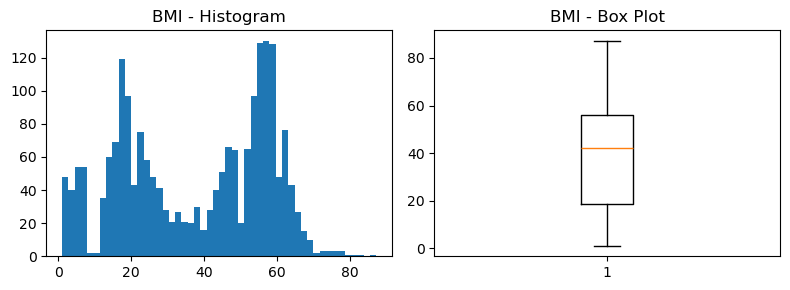

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["BMI"], bins=50)
axes[0].set_title('BMI - Histogram')

axes[1].boxplot(train_data["BMI"].dropna())
axes[1].set_title('BMI - Box Plot')

plt.tight_layout()
plt.show()

* Type: Continuous Variables
* The attribute present a bimodal distribution, which signifies there are two distinct groups, the relatively healthy ones (around 20) and the morbidly obese ones (around 60).

___Under5LS:___

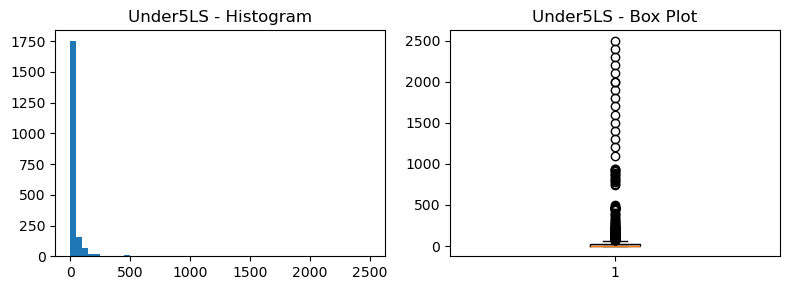

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Under5LS"], bins=50)
axes[0].set_title('Under5LS - Histogram')

axes[1].boxplot(train_data["Under5LS"].dropna())
axes[1].set_title('Under5LS - Box Plot')

plt.tight_layout()
plt.show()

___Polio:___

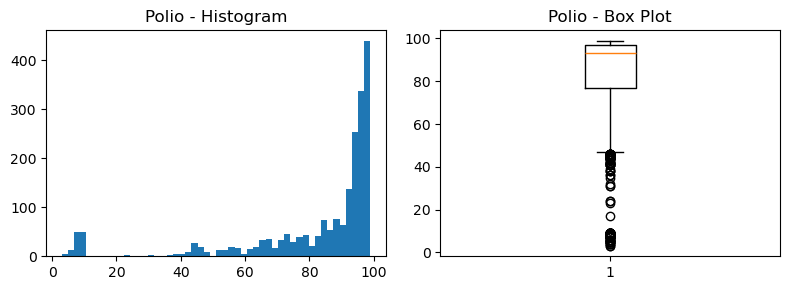

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Polio"], bins=50)
axes[0].set_title('Polio - Histogram')

axes[1].boxplot(train_data["Polio"].dropna())
axes[1].set_title('Polio - Box Plot')

plt.tight_layout()
plt.show()

___TotalExpenditure:___

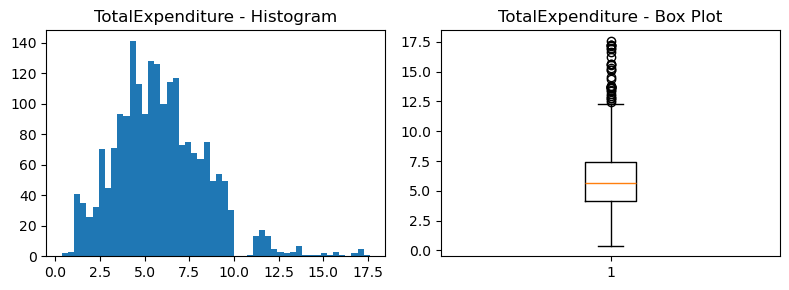

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["TotalExpenditure"], bins=50)
axes[0].set_title('TotalExpenditure - Histogram')

axes[1].boxplot(train_data["TotalExpenditure"].dropna())
axes[1].set_title('TotalExpenditure - Box Plot')

plt.tight_layout()
plt.show()

___Diphtheria:___

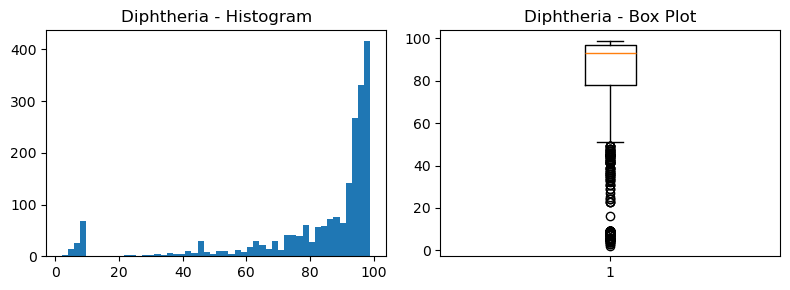

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Diphtheria"], bins=50)
axes[0].set_title('Diphtheria - Histogram')

axes[1].boxplot(train_data["Diphtheria"].dropna())
axes[1].set_title('Diphtheria - Box Plot')

plt.tight_layout()
plt.show()

___HIV-AIDS:___

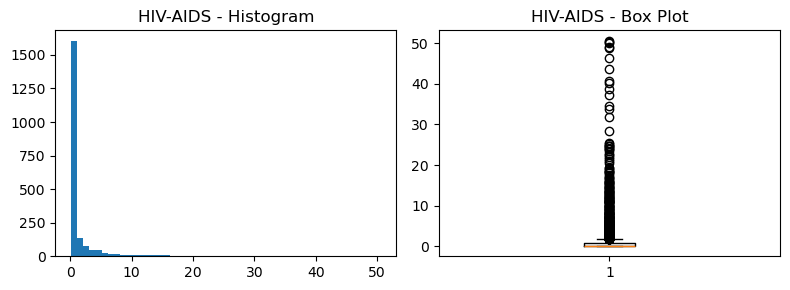

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["HIV-AIDS"], bins=50)
axes[0].set_title('HIV-AIDS - Histogram')

axes[1].boxplot(train_data["HIV-AIDS"].dropna())
axes[1].set_title('HIV-AIDS - Box Plot')

plt.tight_layout()
plt.show()

___GDP:___

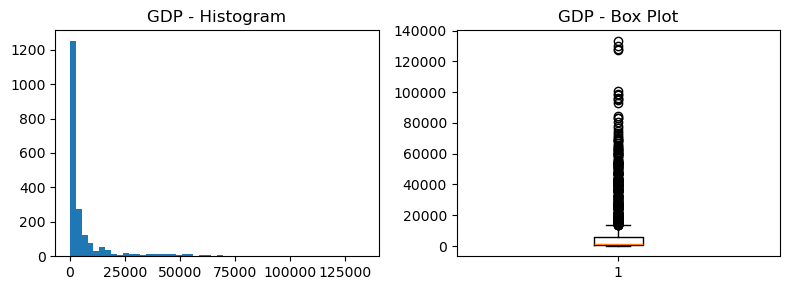

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["GDP"], bins=50)
axes[0].set_title('GDP - Histogram')

axes[1].boxplot(train_data["GDP"].dropna())
axes[1].set_title('GDP - Box Plot')

plt.tight_layout()
plt.show()

___Population:___

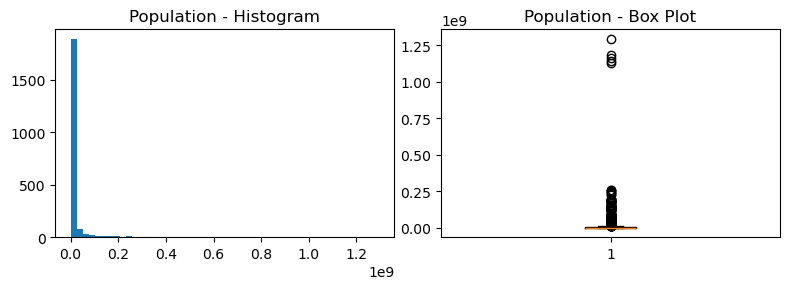

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Population"], bins=50)
axes[0].set_title('Population - Histogram')

axes[1].boxplot(train_data["Population"].dropna())
axes[1].set_title('Population - Box Plot')

plt.tight_layout()
plt.show()

___Thinness10-19years:___

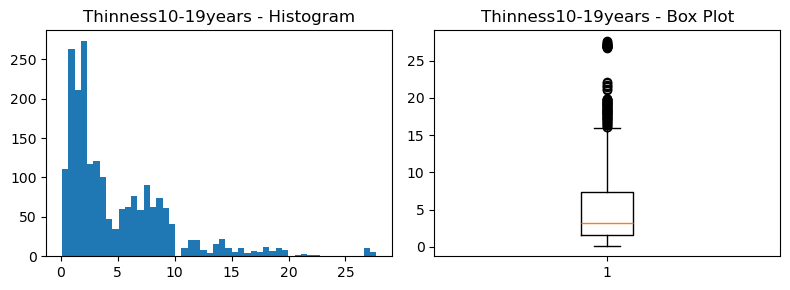

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Thinness10-19years"], bins=50)
axes[0].set_title('Thinness10-19years - Histogram')

axes[1].boxplot(train_data["Thinness10-19years"].dropna())
axes[1].set_title('Thinness10-19years - Box Plot')

plt.tight_layout()
plt.show()

___Thinness5-9years:___

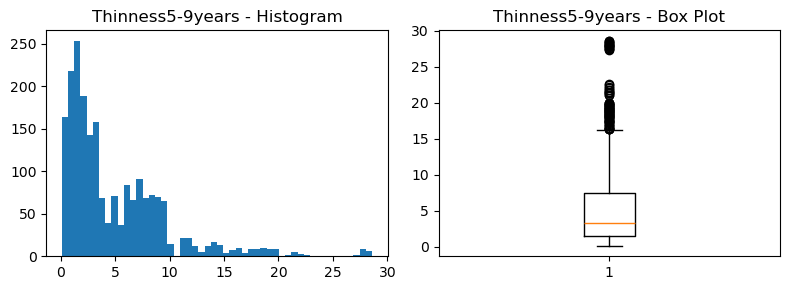

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Thinness5-9years"], bins=50)
axes[0].set_title('Thinness5-9years - Histogram')

axes[1].boxplot(train_data["Thinness5-9years"].dropna())
axes[1].set_title('Thinness5-9years - Box Plot')

plt.tight_layout()
plt.show()

___IncomeCompositionOfResources:___

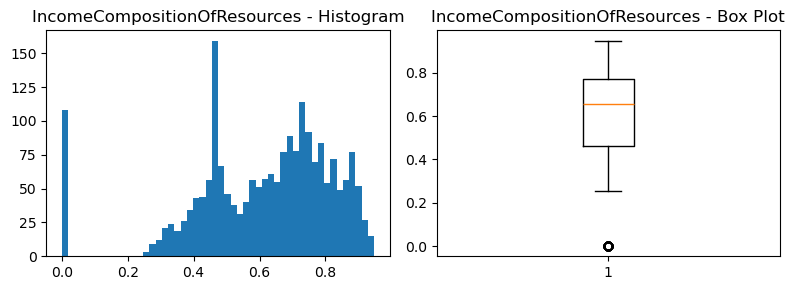

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["IncomeCompositionOfResources"], bins=50)
axes[0].set_title('IncomeCompositionOfResources - Histogram')

axes[1].boxplot(train_data["IncomeCompositionOfResources"].dropna())
axes[1].set_title('IncomeCompositionOfResources - Box Plot')

plt.tight_layout()
plt.show()

___Schooling:___

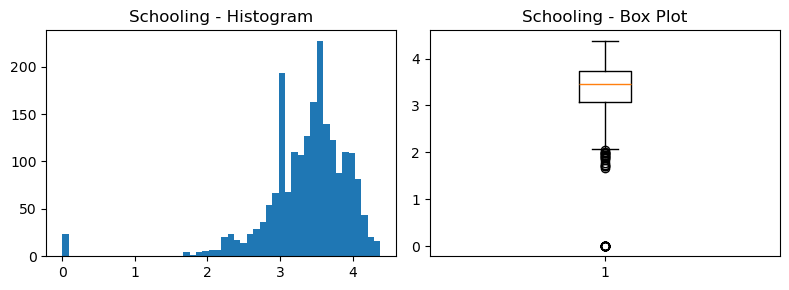

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].hist(train_data["Schooling"], bins=50)
axes[0].set_title('Schooling - Histogram')

axes[1].boxplot(train_data["Schooling"].dropna())
axes[1].set_title('Schooling - Box Plot')

plt.tight_layout()
plt.show()